## 1. Comprender el problema y el caso de estudio.


<table>
  <tr><td>
    <img src="media/img1.png"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Caso de estudio: Prediccion de retención de empleados
  </td></tr>
</table>


![alt text](media/img2.png)

https://cobee.io/blog/bienestar-laboral-empleado/

https://www.rrhhdigital.com/secciones/compensacion/147791/El-coste-de-la-desmotivacion-contratar-a-un-trabajador-nuevo-supone-de-tres-a-seis-meses-de-salario-del-empleado-que-marcha

![Planteamiento](media/img3.png)

## 2. Importar librerias y datasets.

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
# Leemos el dataset que tenemos ya descargado de Kaggle

empleados_df = pd.read_csv('data/Human_Resources.csv')


In [216]:
empleados_df.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### El conjunto de datos de rotación de IBM HR Analytics ofrece una visión integral de la deserción de empleados dentro de una organización. Este conjunto de datos proporciona información valiosa sobre los factores que contribuyen a la rotación de empleados y permite una comprensión más profunda de la dinámica de la fuerza laboral.

#### Las columnas en el dataset son:

-  Edad: La edad de los empleados.
-  Rotacion: Indica si un empleado ha dejado la organización (Sí) o sigue empleado (No).
-  BusinessTravel: La frecuencia de los viajes de negocios realizados por los empleados.
-  DailyRate: El pago diario.
-  Departament: El departamento en el que trabajan.
-  DistanceFromHome: La distancia entre las casas  y su lugar de trabajo.
-  Education: El nivel de educación de cada empleado.
-  EducationField: El campo de la carrera de los empleados.
-  EmployeeCount: El conteo total.
-  EmployeeNumber: El identificador único para cada empleado.
-  Satisfacción Ambiental: El nivel de satisfacción según el ambiente de trabajo.
-  Gender.
-  HourlyRate: El pago por hora de los empleados.
-  JobInvolvement: el nivel de participación en el trabajo o compromiso de los empleados.
-  JobLevel: El nivel o rango de los empleados dentro de la organización.
-  JobRole: El rol o puesto específico de los empleados.
-  JobSatisfaction: El nivel de satisfacción de dicen tener los empleados con sus trabajos.
-  Estado Civil.
-  MonthlyIncome: El ingreso mensual.
-  MonthlyRate: La tarifa mensual de pago para los empleados.
-  NumCompaniesWorked: el número de empresas en las que los empleados han trabajado en el pasado.
-  Over18: Indica si son mayores de 18 años.
-  OverTime: Indica si trabajan horas extras o no.
- PercentSalaryHike: El porcentaje de aumentos en el salario.
- PerformanceRating: La calificación del desempeño de los empleados.
- RelationshipSatisfaction: el nivel de satisfacción de los empleados dicen tener con sus relaciones laborales.
- StandardHours: el número estándar de horas trabajadas.
- StockOptionLevel: El nivel de opciones sobre acciones de la empresa.
- TotalWorkingYears: El número total de años que han trabajado.
- TrainingTimesLastYear: la cantidad de veces que se capacitó a los empleados el año pasado.
- WorkLifeBalance: El equilibrio entre el trabajo y la vida personal tal como lo perciben los empleados.
- YearsAtCompany: el número de años que han pasado en la empresa.
- YearsInCurrentRole: la cantidad de años que han estado en su rol actual.
- YearsSinceLastPromotion: el número de años desde su última promoción.
- YearsWithCurrManager: la cantidad de años que han trabajado con su gerente actual.
 
Nuestro objetivo es descubrir tendencias, patrones e indicadores potenciales de desgaste dentro de la organización y evitar su consecuencia, una alta rotación de empleados.

In [217]:
# Voy a cambiar los nombres a español.

# Nombres en inglés y sus equivalentes en español

nombres_columnas = {
    'Age': 'Edad',
    'Attrition': 'Rotacion',
    'BusinessTravel': 'ViajesDeNegocios',
    'DailyRate': 'TarifaDiaria',
    'Department': 'Departamento',
    'DistanceFromHome': 'DistanciaDesdeCasa',
    'Education': 'Educación',
    'EducationField': 'CampoEducacion',
    'EmployeeCount': 'CantidadEmpleados',
    'EmployeeNumber': 'NumeroEmpleado',
    'EnvironmentSatisfaction': 'SatisfacciónAmbiente',
    'Gender': 'Genero',
    'HourlyRate': 'TarifaPorHora',
    'JobInvolvement': 'CompromisoLaboral',
    'JobLevel': 'NivelPuesto',
    'JobRole': 'RolPuesto',
    'JobSatisfaction': 'SatisfaccionLaboral',
    'MaritalStatus': 'EstadoCivil',
    'MonthlyIncome': 'IngresoMensual',
    'MonthlyRate': 'TarifaMensual',
    'NumCompaniesWorked': 'NumEmpresasTrabajo',
    'Over18': 'MayoresDe18',
    'OverTime': 'HorasExtra',
    'PercentSalaryHike': '%IncrementoSalario',
    'PerformanceRating': 'CalificaciónDesempeño',
    'RelationshipSatisfaction': 'SatisfacciónRelaciones',
    'StandardHours': 'HorasEstandar',
    'StockOptionLevel': 'NivelOpcionAcciones',
    'TotalWorkingYears': 'TotalAñosTrabajados',
    'TrainingTimesLastYear': 'EntrenamientosAñoPasado',
    'WorkLifeBalance': 'EquilibrioVidaLaboral',
    'YearsAtCompany': 'AñosEnEmpresa',
    'YearsInCurrentRole': 'AñosEnRolActual',
    'YearsSinceLastPromotion': 'AñosDesdeUltimaPromocion',
    'YearsWithCurrManager': 'AñosConActualGerente'
}

empleados_df = empleados_df.rename(columns=nombres_columnas)

In [218]:
#first look

empleados_df.head(5)

,Edad,Rotacion,ViajesDeNegocios,TarifaDiaria,Departamento,DistanciaDesdeCasa,Educación,CampoEducacion,CantidadEmpleados,NumeroEmpleado,...,SatisfacciónRelaciones,HorasEstandar,NivelOpcionAcciones,TotalAñosTrabajados,EntrenamientosAñoPasado,EquilibrioVidaLaboral,AñosEnEmpresa,AñosEnRolActual,AñosDesdeUltimaPromocion,AñosConActualGerente
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [219]:
empleados_df.tail(5)

,Edad,Rotacion,ViajesDeNegocios,TarifaDiaria,Departamento,DistanciaDesdeCasa,Educación,CampoEducacion,CantidadEmpleados,NumeroEmpleado,...,SatisfacciónRelaciones,HorasEstandar,NivelOpcionAcciones,TotalAñosTrabajados,EntrenamientosAñoPasado,EquilibrioVidaLaboral,AñosEnEmpresa,AñosEnRolActual,AñosDesdeUltimaPromocion,AñosConActualGerente
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [220]:
empleados_df.info()
# 1470  registros de datos (empleados) y 35 caracteristicas tomadas de cada uno.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Edad                      1470 non-null   int64 
 1   Rotacion                  1470 non-null   object
 2   ViajesDeNegocios          1470 non-null   object
 3   TarifaDiaria              1470 non-null   int64 
 4   Departamento              1470 non-null   object
 5   DistanciaDesdeCasa        1470 non-null   int64 
 6   Educación                 1470 non-null   int64 
 7   CampoEducacion            1470 non-null   object
 8   CantidadEmpleados         1470 non-null   int64 
 9   NumeroEmpleado            1470 non-null   int64 
 10  SatisfacciónAmbiente      1470 non-null   int64 
 11  Genero                    1470 non-null   object
 12  TarifaPorHora             1470 non-null   int64 
 13  CompromisoLaboral         1470 non-null   int64 
 14  NivelPuesto             

# 3. Visualizando y limpiando el dataset:  EDA.

In [221]:
empleados_df.describe()

,Edad,TarifaDiaria,DistanciaDesdeCasa,Educación,CantidadEmpleados,NumeroEmpleado,SatisfacciónAmbiente,TarifaPorHora,CompromisoLaboral,NivelPuesto,...,SatisfacciónRelaciones,HorasEstandar,NivelOpcionAcciones,TotalAñosTrabajados,EntrenamientosAñoPasado,EquilibrioVidaLaboral,AñosEnEmpresa,AñosEnRolActual,AñosDesdeUltimaPromocion,AñosConActualGerente
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [222]:
empleados_df.nunique()

Edad                          43
Rotacion                       2
ViajesDeNegocios               3
TarifaDiaria                 886
Departamento                   3
DistanciaDesdeCasa            29
Educación                      5
CampoEducacion                 6
CantidadEmpleados              1
NumeroEmpleado              1470
SatisfacciónAmbiente           4
Genero                         2
TarifaPorHora                 71
CompromisoLaboral              4
NivelPuesto                    5
RolPuesto                      9
SatisfaccionLaboral            4
EstadoCivil                    3
IngresoMensual              1349
TarifaMensual               1427
NumEmpresasTrabajo            10
MayoresDe18                    1
HorasExtra                     2
%IncrementoSalario            15
CalificaciónDesempeño          2
SatisfacciónRelaciones         4
HorasEstandar                  1
NivelOpcionAcciones            4
TotalAñosTrabajados           40
EntrenamientosAñoPasado        7
Equilibrio

In [223]:
#Busquemos valores nulos y vacios, por suerte no habrá ninguno.

#nan_values = empleados_df.isna().sum()
#print(nan_values)

# No hay valores nulos


In [224]:
#Tenemos 26 variables continuas y 9 categoricas.

empleados_df.dtypes.value_counts()

int64     26
object     9
Name: count, dtype: int64

array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'TarifaDiaria'}>,
        <Axes: title={'center': 'DistanciaDesdeCasa'}>,
        <Axes: title={'center': 'Educación'}>,
        <Axes: title={'center': 'CantidadEmpleados'}>],
       [<Axes: title={'center': 'NumeroEmpleado'}>,
        <Axes: title={'center': 'SatisfacciónAmbiente'}>,
        <Axes: title={'center': 'TarifaPorHora'}>,
        <Axes: title={'center': 'CompromisoLaboral'}>,
        <Axes: title={'center': 'NivelPuesto'}>],
       [<Axes: title={'center': 'SatisfaccionLaboral'}>,
        <Axes: title={'center': 'IngresoMensual'}>,
        <Axes: title={'center': 'TarifaMensual'}>,
        <Axes: title={'center': 'NumEmpresasTrabajo'}>,
        <Axes: title={'center': '%IncrementoSalario'}>],
       [<Axes: title={'center': 'CalificaciónDesempeño'}>,
        <Axes: title={'center': 'SatisfacciónRelaciones'}>,
        <Axes: title={'center': 'HorasEstandar'}>,
        <Axes: title={'center': 'NivelOp

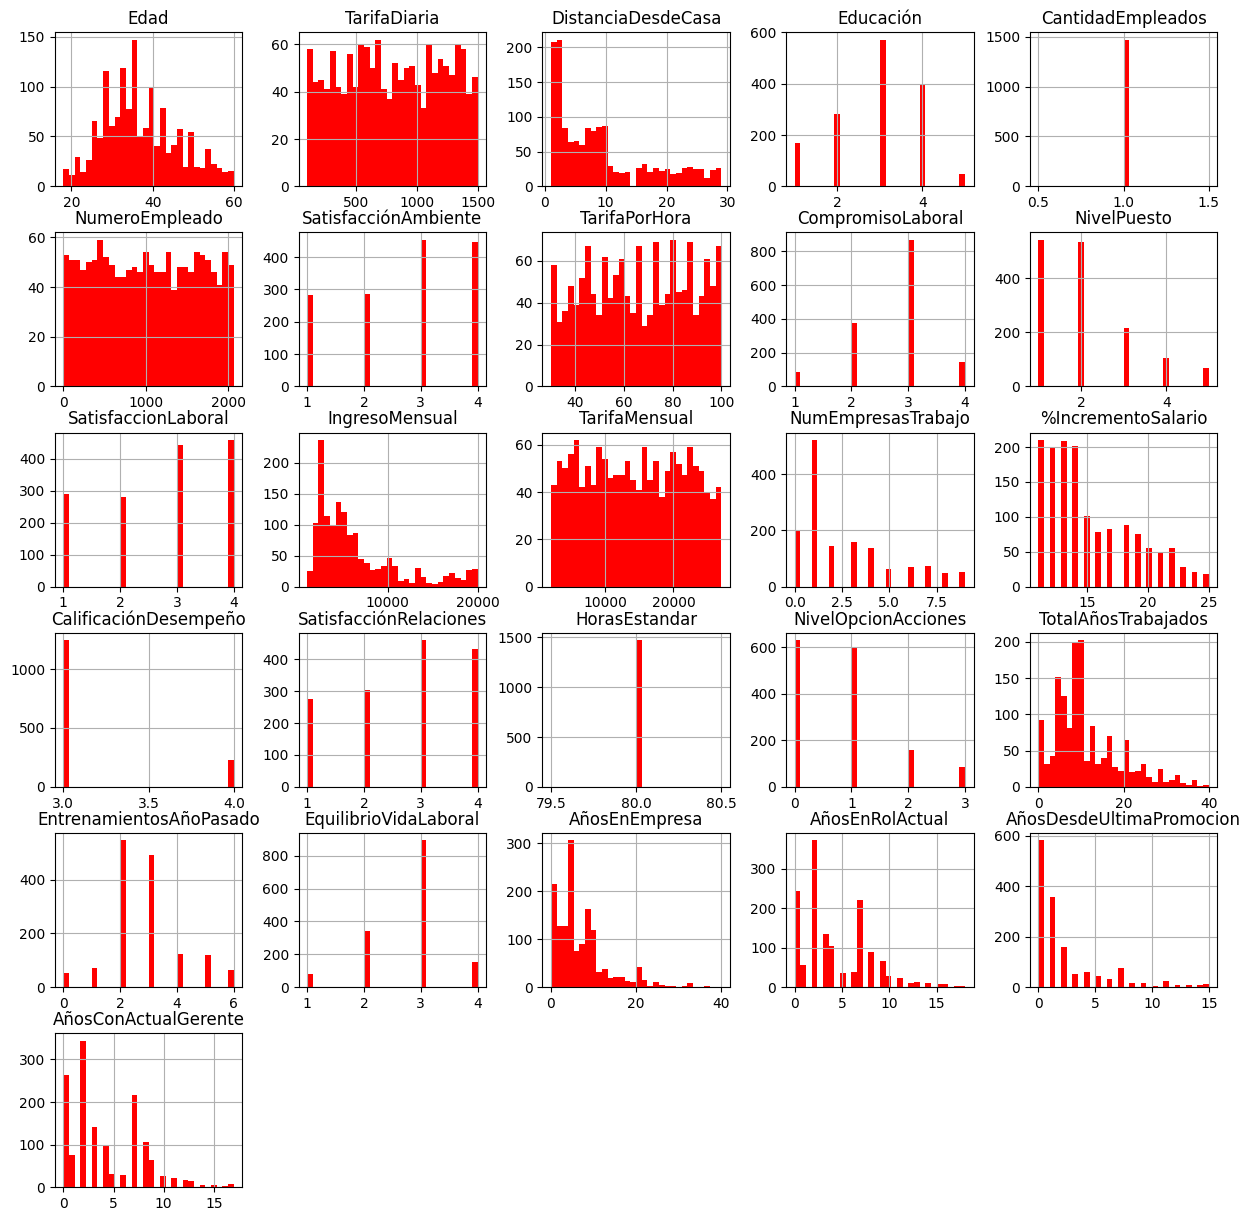

In [225]:
# Vamos a ver un poco las características numéricas
# Quizás podemos descartar algunas
empleados_df.hist(bins = 30, figsize = (15,15), color = 'r')

Varias caracteristicas, como **Ingreso mensual, Total de años trabajados**, tienen una distribución **_tail heavy_**, esto podría indicar que hay algunos empleados con ingresos mensuales o años trabajados mucho más altos en comparación con la mayoría de los otros empleados.

Tambien tiene sentido eliminar columnas con solo 1 valor único que no tienen ningún impacto **'Cantidad empleados', 'HorasEstandar' y 'MayorDe18'** ya que no cambian en todo el dataset.

También eliminemos **'Numero de empleado'**

In [226]:
empleados_df.drop(['CantidadEmpleados', 'HorasEstandar', 'MayoresDe18', 'NumeroEmpleado'], axis=1, inplace=True)

In [227]:
empleados_df.columns

Index(['Edad', 'Rotacion', 'ViajesDeNegocios', 'TarifaDiaria', 'Departamento',
       'DistanciaDesdeCasa', 'Educación', 'CampoEducacion',
       'SatisfacciónAmbiente', 'Genero', 'TarifaPorHora', 'CompromisoLaboral',
       'NivelPuesto', 'RolPuesto', 'SatisfaccionLaboral', 'EstadoCivil',
       'IngresoMensual', 'TarifaMensual', 'NumEmpresasTrabajo', 'HorasExtra',
       '%IncrementoSalario', 'CalificaciónDesempeño', 'SatisfacciónRelaciones',
       'NivelOpcionAcciones', 'TotalAñosTrabajados', 'EntrenamientosAñoPasado',
       'EquilibrioVidaLaboral', 'AñosEnEmpresa', 'AñosEnRolActual',
       'AñosDesdeUltimaPromocion', 'AñosConActualGerente'],
      dtype='object')

In [228]:
#Quiero saber cuales son variables categoricas para realizar un posible encoding

cols_bin = []

for col in empleados_df.select_dtypes(include='object'):
    cols_bin.append(col)
print(cols_bin)

['Rotacion', 'ViajesDeNegocios', 'Departamento', 'CampoEducacion', 'Genero', 'RolPuesto', 'EstadoCivil', 'HorasExtra']


In [229]:
# Dividamos los empleados dejaron la empresa y craremos un dataframe para exempleados = exemp_df

exemp_df= empleados_df[empleados_df['Rotacion'] == 'Yes']
emp_df= empleados_df[empleados_df['Rotacion'] == 'No']


In [230]:
print("Total empleados=", len(empleados_df))

print("Número de empleados que abandonaron la empresa.=", len(exemp_df))
print("Porcentaje de empleados que abandonaron la empresa =", 1.*len(exemp_df)/len(empleados_df)*100.0, "%")
 
print("Número de empleados que no abandonaron la empresa =", len(emp_df ))
print("Porcentaje de empleados que no abandonaron la empresa  =", 1.*len(emp_df)/len(empleados_df)*100.0, "%")

Total empleados= 1470
Número de empleados que abandonaron la empresa.= 237
Porcentaje de empleados que abandonaron la empresa = 16.122448979591837 %
Número de empleados que no abandonaron la empresa = 1233
Porcentaje de empleados que no abandonaron la empresa  = 83.87755102040816 %


Estas cantidades nos dicen que estamos tratando con un **datos desequilibrados**, Entonces voy a probar un poco con estos datos pero seguramente tendre que aplicarles Encoding y oversampling, para poder tener una distribución equilibrada 

**Objetivo:** Construir modelos de clasificacion que nos ayuden a determinar cuales empleados son propensos a irse o cuales son nuestros puntos debiles en cuanto a la retencion de el talento. **Clasificación Binaria*


#

In [231]:
exemp_df

,Edad,Rotacion,ViajesDeNegocios,TarifaDiaria,Departamento,DistanciaDesdeCasa,Educación,CampoEducacion,SatisfacciónAmbiente,Genero,...,CalificaciónDesempeño,SatisfacciónRelaciones,NivelOpcionAcciones,TotalAñosTrabajados,EntrenamientosAñoPasado,EquilibrioVidaLaboral,AñosEnEmpresa,AñosEnRolActual,AñosDesdeUltimaPromocion,AñosConActualGerente
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,...,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,...,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,...,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,...,3,4,2,12,3,3,6,3,0,1


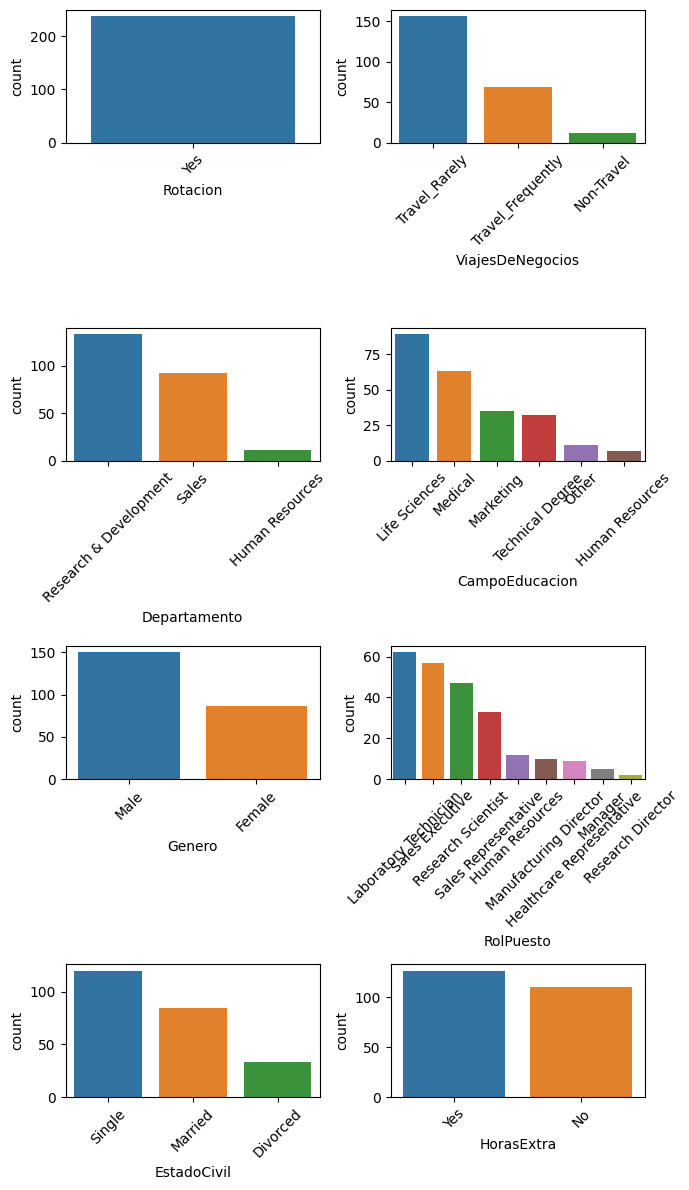

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las columnas categóricas
"""
Estos gráficos los podemos cambiar por los diferentes datasets divididos como emp_df y exemp_df para poder buscar diferencias

"""
obj_col = exemp_df.select_dtypes(include='object').columns

plt.figure(figsize=(7, 12))
for i, col in enumerate(obj_col):
    axes = plt.subplot(4, 2, i + 1)
    category_counts = exemp_df[col].value_counts().sort_values(ascending=False)
    sns.countplot(x=exemp_df[col], order=category_counts.index)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### En los gráficos de arriba vemos algunas de las características que tienen los empleados que se fueron de la compañia.

Como por ejemplo:

1. La mayoría solteros.
2. Técnicos de laboratorio y ejecutivos de venta
3. Trabajaban en el dpto de investigación y desarrollo y ventas
4. No viajaban demasiado por negocios

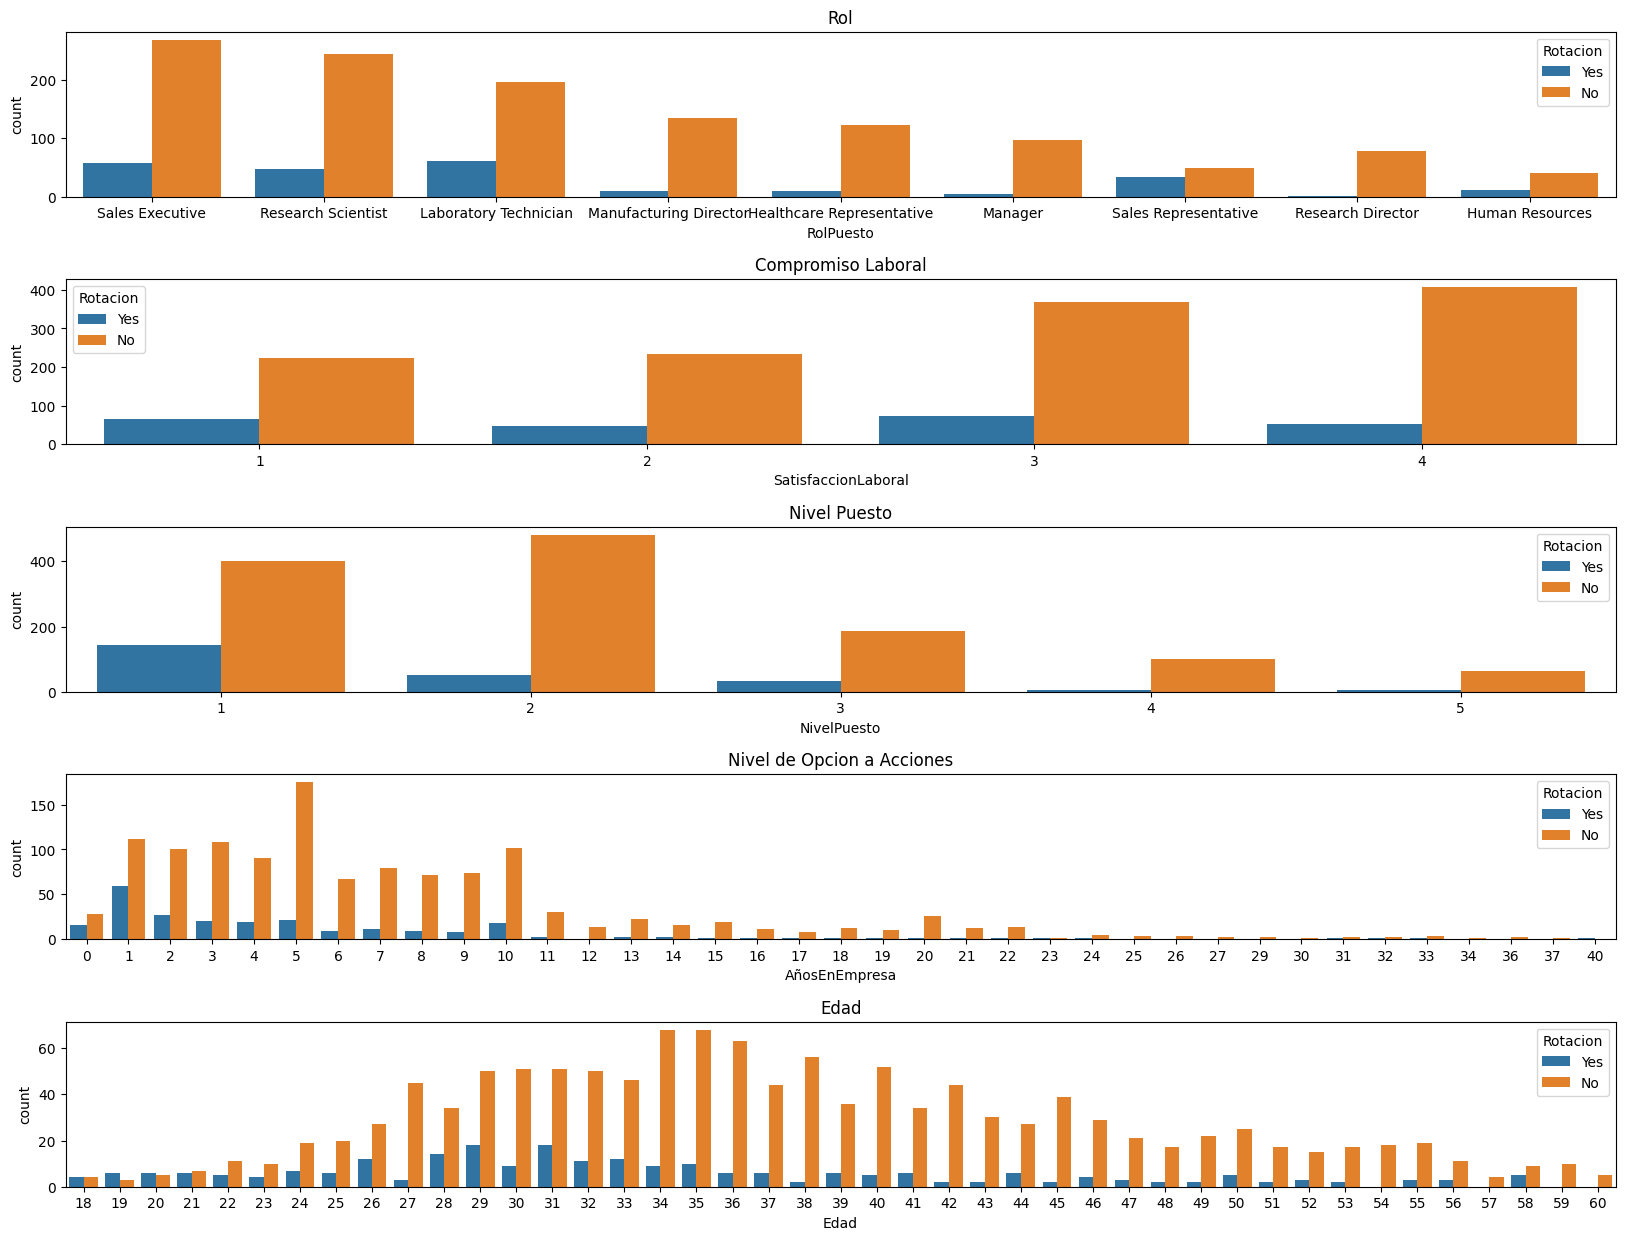

In [233]:
fig, axs = plt.subplots(5, 1, figsize=(20,15))
plt.subplots_adjust(hspace=0.5) 

# Gráfico 1
axs[0].set_title('Rol')
sns.countplot(x='RolPuesto', hue='Rotacion', data=empleados_df, ax=axs[0])

# Gráfico 2
axs[1].set_title('Compromiso Laboral')
sns.countplot(x='SatisfaccionLaboral', hue='Rotacion', data=empleados_df, ax=axs[1])

# Gráfico 3
axs[2].set_title('Nivel Puesto')
sns.countplot(x='NivelPuesto', hue='Rotacion', data=empleados_df, ax=axs[2])

# Gráfico 4
axs[3].set_title('Nivel de Opcion a Acciones')
sns.countplot(x='AñosEnEmpresa', hue='Rotacion', data=empleados_df, ax=axs[3])

axs[4].set_title('Edad')
sns.countplot(x = 'Edad', hue='Rotacion', data=empleados_df, ax=axs[4])

plt.show()

Los empleados que se fueron vivía ligeramente más lejos de el trabajo


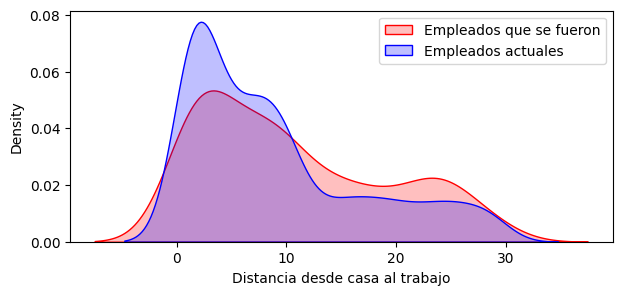

In [298]:

# KDE (Kernel density estimator) se utiliza para visualizar la densidad de probabilidad de una variable continua.
# KDE describe la densidad de probabilidad en diferentes valores en una variable continua (numérica.)

plt.figure(figsize=(7,3))

sns.kdeplot(exemp_df['DistanciaDesdeCasa'], label='Empleados que se fueron', fill=True, color='r')
sns.kdeplot(emp_df['DistanciaDesdeCasa'], label='Empleados actuales', fill=True, color='b')

plt.xlabel('Distancia desde casa al trabajo')
plt.legend(['Empleados que se fueron', 'Empleados actuales'])

print('Los empleados que se fueron vivía ligeramente más lejos de el trabajo')


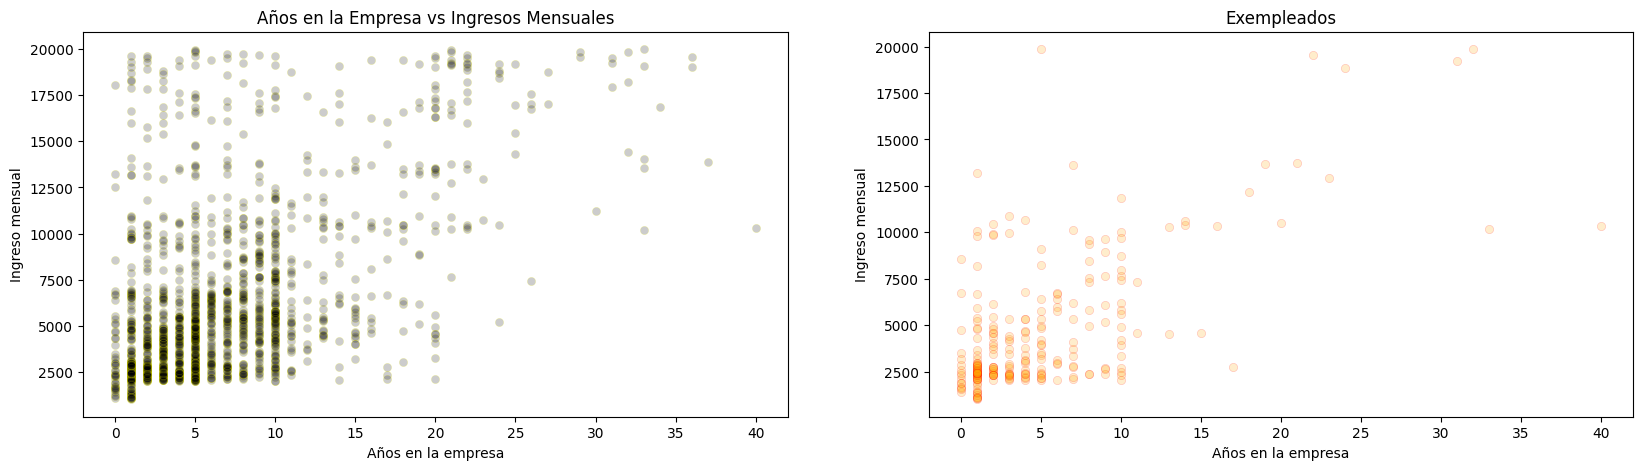

In [236]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.2)  # Ajustar el espacio horizontal entre subgráficos

# Gráfico 1
axs[0].set_title('Años en la Empresa vs Ingresos Mensuales')
sns.scatterplot(data=empleados_df, x='AñosEnEmpresa', y='IngresoMensual', color='black', edgecolor='yellow', alpha=0.2, ax=axs[0])
axs[0].set_xlabel('Años en la empresa')
axs[0].set_ylabel('Ingreso mensual')

# Gráfico 2
axs[1].set_title('Exempleados')
sns.scatterplot(data=exemp_df, x='AñosEnEmpresa', y = 'IngresoMensual', color='orange', edgecolor='red', alpha=0.2, ax=axs[1])
axs[1].set_xlabel('Años en la empresa')
axs[1].set_ylabel('Ingreso mensual')

plt.show()

Hay una ligera correlación positiva entre la cantidad de años que un empleado ha estado en la empresa y sus ingresos mensuales. Aunque la relación no es muy fuerte, sugiere que, en promedio, los empleados que están más tiempo en la compañia van ganando un poco más pero no es algo tan remarcado.

Vemos que sobre el rango de los 2 y 3 años es donde la mayoria de los empleados ha decidido abandonar la empresa.

Quiero hacerle One Hot encoding a las variables categoricas, esto quiere decir pasan de ser Representaciones de Si y No u Otras respuestas de tipo categorica a ser representadas con números, de esta manera estarán en el formato adecuado para construir nuestro modelo y seguir haciendo comprobaciones.

In [237]:
categorical_cols = []

for col in empleados_df.select_dtypes(include='object'):
    if empleados_df[col].nunique() > 2:
        categorical_cols.append(col)
        unique_classes = empleados_df[col].unique()
        print(f"Columna: {col}, Clases: {unique_classes}")

Columna: ViajesDeNegocios, Clases: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Columna: Departamento, Clases: ['Sales' 'Research & Development' 'Human Resources']
Columna: CampoEducacion, Clases: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Columna: RolPuesto, Clases: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Columna: EstadoCivil, Clases: ['Single' 'Married' 'Divorced']


In [238]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

columns_to_encode = ['Rotacion', 'ViajesDeNegocios', 'Departamento',
                     'CampoEducacion', 'Genero', 'RolPuesto', 'EstadoCivil',
                     'HorasExtra']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    values = np.unique(empleados_df[col])
    empleados_df[col] = label_encoder.fit_transform(empleados_df[col])
    encoded_values = label_encoder.transform(values)
    class_to_value = {label: value for label, value in zip(label_encoder.classes_, encoded_values)}
    print(f'La columna {col} fue codificada como: {class_to_value}')


La columna Rotacion fue codificada como: {'No': 0, 'Yes': 1}
La columna ViajesDeNegocios fue codificada como: {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
La columna Departamento fue codificada como: {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
La columna CampoEducacion fue codificada como: {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
La columna Genero fue codificada como: {'Female': 0, 'Male': 1}
La columna RolPuesto fue codificada como: {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
La columna EstadoCivil fue codificada como: {'Divorced': 0, 'Married': 1, 'Single': 2}
La columna HorasExtra fue codificada como: {'No': 0, 'Yes': 1}


In [239]:
## Esta funcion la podemos cambiar por los diferentes datasets divididos como emp_df y exemp_df para poder buscar diferencias
## Entre medias y desviaciones estandar de cada dataset

exemp_df.describe().T #Esta funcion mostrará la media y otras medidas de las variables Numéricas o continuas.

,count,mean,std,min,25%,50%,75%,max
Edad,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
TarifaDiaria,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanciaDesdeCasa,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Educación,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
SatisfacciónAmbiente,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
TarifaPorHora,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
CompromisoLaboral,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
NivelPuesto,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
SatisfaccionLaboral,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0
IngresoMensual,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


**Veamos ahora cuales variables numéricas necesitan ser reescaladas** para tener un modelo con poco ruido y que aprenda los patrones mas significativos de los datos, además el reescalado de caracteristicas con rangos muy extensos **evita el sobreajuste del modelo a los datos de entrenamiento.**

In [240]:
# Veamos ahora cuales variables numéricas necesitan ser reescaladas

import pandas as pd

datos_numericos = empleados_df.select_dtypes(include='number')
for columna in datos_numericos:
    print("'" + columna + "'", "Rango de valores:", datos_numericos[columna].min(), "-", datos_numericos[columna].max())
    print("-" * 30)
print("Los valores mostrados anteriormente, muestran que necesitamos\nreescalar algunos valores.")


'Edad' Rango de valores: 18 - 60
------------------------------
'Rotacion' Rango de valores: 0 - 1
------------------------------
'ViajesDeNegocios' Rango de valores: 0 - 2
------------------------------
'TarifaDiaria' Rango de valores: 102 - 1499
------------------------------
'Departamento' Rango de valores: 0 - 2
------------------------------
'DistanciaDesdeCasa' Rango de valores: 1 - 29
------------------------------
'Educación' Rango de valores: 1 - 5
------------------------------
'CampoEducacion' Rango de valores: 0 - 5
------------------------------
'SatisfacciónAmbiente' Rango de valores: 1 - 4
------------------------------
'Genero' Rango de valores: 0 - 1
------------------------------
'TarifaPorHora' Rango de valores: 30 - 100
------------------------------
'CompromisoLaboral' Rango de valores: 1 - 4
------------------------------
'NivelPuesto' Rango de valores: 1 - 5
------------------------------
'RolPuesto' Rango de valores: 0 - 8
------------------------------
'Satisfa

In [241]:
""" Vamos a empezar a escalar los valores mas divergentes como son:
- 'IngresoMensual' Rango de valores: 1009 - 19999

- 'TarifaMensual' Rango de valores: 2094 - 26999

- 'TarifaDiaria' Rango de valores: 102 - 1499

- 'TarifaPorHora' Rango de valores: 30 - 100

- '%IncrementoSalario' Rango de valores: 11 - 25
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(empleados_df[['TarifaPorHora', 'TarifaDiaria', 'TarifaMensual', 'IngresoMensual', '%IncrementoSalario']])
scaled_data = scaler.transform(empleados_df[['TarifaPorHora', 'TarifaDiaria', 'TarifaMensual',
                                             'IngresoMensual', '%IncrementoSalario']])
empleados_df[['TarifaPorHora', 'TarifaDiaria', 'TarifaMensual', 'IngresoMensual', '%IncrementoSalario']] = scaled_data
empleados_df.head()

,Edad,Rotacion,ViajesDeNegocios,TarifaDiaria,Departamento,DistanciaDesdeCasa,Educación,CampoEducacion,SatisfacciónAmbiente,Genero,...,CalificaciónDesempeño,SatisfacciónRelaciones,NivelOpcionAcciones,TotalAñosTrabajados,EntrenamientosAñoPasado,EquilibrioVidaLaboral,AñosEnEmpresa,AñosEnRolActual,AñosDesdeUltimaPromocion,AñosConActualGerente
0,41,1,2,0.715820,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,0.126700,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,0.909807,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,0.923407,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,0.350036,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


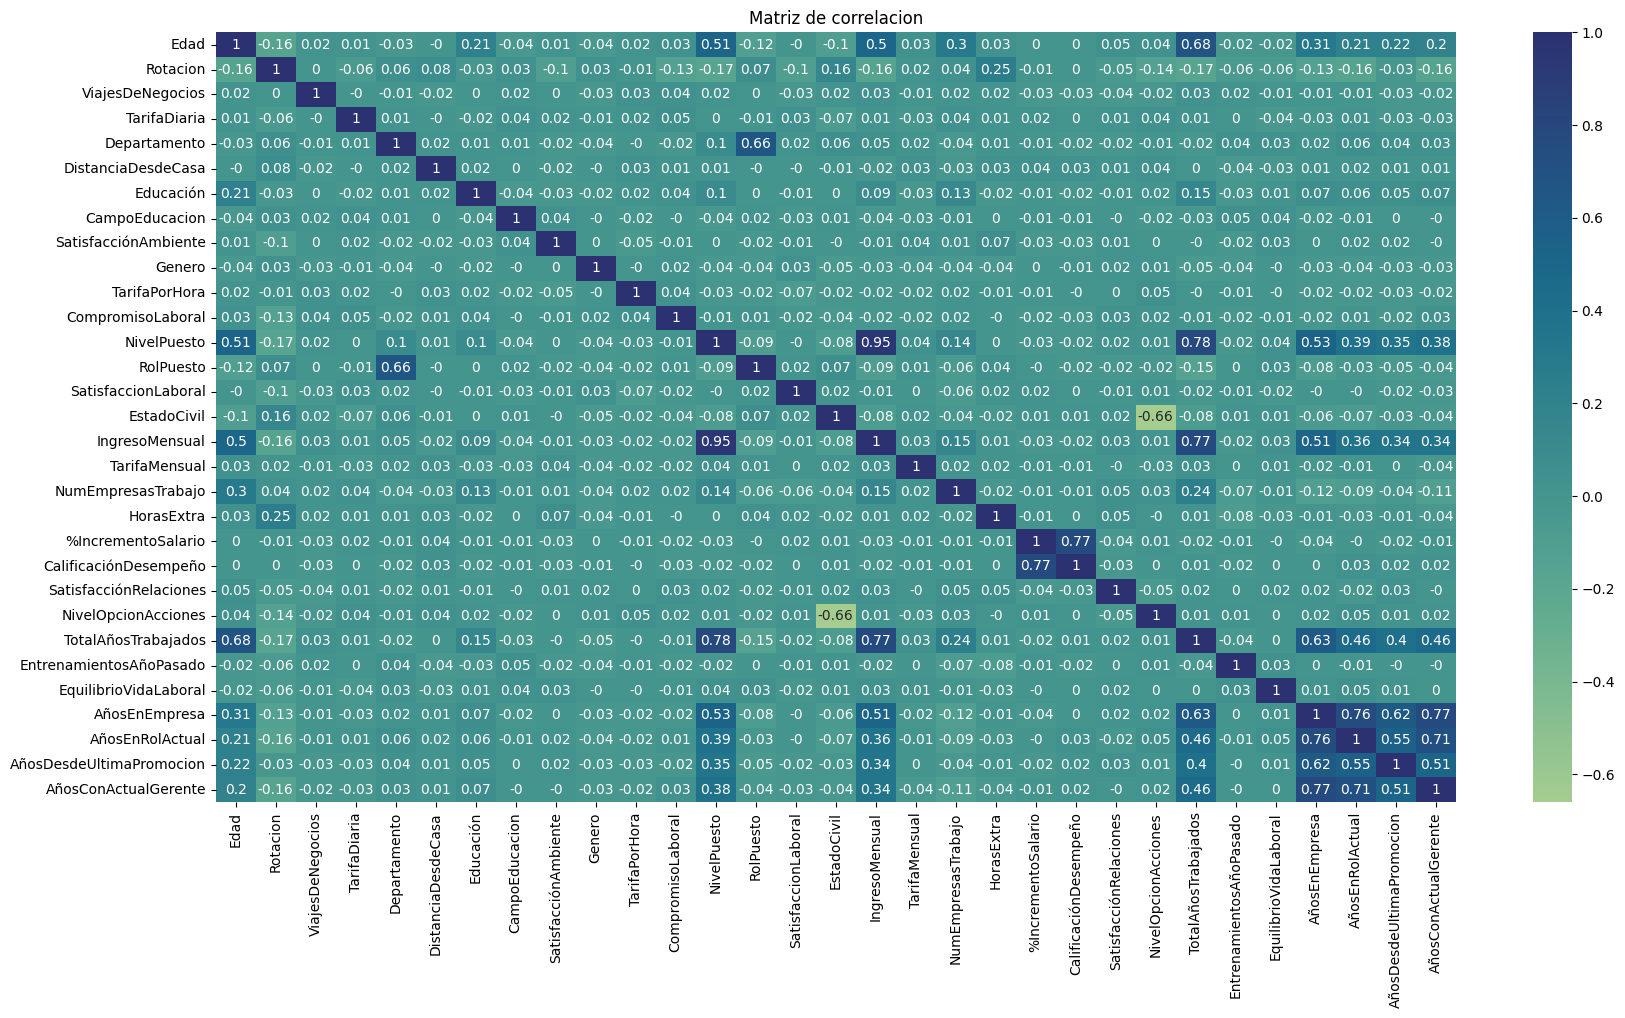

In [242]:
corr = round(empleados_df.corr(), 2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, cmap='crest')
plt.title('Matriz de correlacion')
plt.show()

**Como se podría esperar:**

- El **nivel del puesto** esta muy correlacionada con los **años trabajados** y **los ingresos mensuales**. Podriamos eliminar alguna de ellas.
- La edad está tambien está considerablemente relacionada con los ingresos mensuales

De momento no voy a eliminar ninguna porque la correlacion no es excesiva y podrian ser perjudicial o llevar a infrajustar el modelo.


### Veamos otros gráficos para ver que otros aspectos de los datos son interesantes.

In [243]:
empleados_df.keys()

Index(['Edad', 'Rotacion', 'ViajesDeNegocios', 'TarifaDiaria', 'Departamento',
       'DistanciaDesdeCasa', 'Educación', 'CampoEducacion',
       'SatisfacciónAmbiente', 'Genero', 'TarifaPorHora', 'CompromisoLaboral',
       'NivelPuesto', 'RolPuesto', 'SatisfaccionLaboral', 'EstadoCivil',
       'IngresoMensual', 'TarifaMensual', 'NumEmpresasTrabajo', 'HorasExtra',
       '%IncrementoSalario', 'CalificaciónDesempeño', 'SatisfacciónRelaciones',
       'NivelOpcionAcciones', 'TotalAñosTrabajados', 'EntrenamientosAñoPasado',
       'EquilibrioVidaLaboral', 'AñosEnEmpresa', 'AñosEnRolActual',
       'AñosDesdeUltimaPromocion', 'AñosConActualGerente'],
      dtype='object')

#### Crearemos un primer conjunto de datos de prueba y entrenamiento, para entrenar un modelo de Bosques aleatorios (Random Forest)  y seguiremos viendo más información en los datos.

In [244]:
# Vamos a crear un primer modelo Random Forest.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc


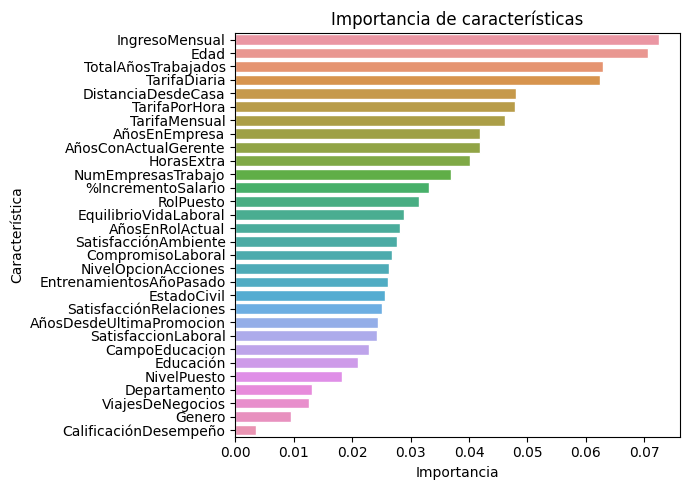

In [329]:
X = empleados_df.drop(['Rotacion'], axis=1)
y = empleados_df['Rotacion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify = y,
                                                    random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [X.columns[i] for i in indices]

plt.figure(figsize=(7, 5))
sns.barplot(x=importances[indices], y=sorted_feature_names, edgecolor='white')
plt.xticks(rotation=0)  # Girar los ticks del eje x en 0 grados
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Importancia de características")
plt.tight_layout()
plt.show()

In [246]:
for feature_name, importance in zip(sorted_feature_names, importances[indices]):
    print(f"{feature_name}: {importance}")

IngresoMensual: 0.07248462303343446
Edad: 0.07061699583611593
TotalAñosTrabajados: 0.06293716514703858
TarifaDiaria: 0.06239864280993665
DistanciaDesdeCasa: 0.04801617043272217
TarifaPorHora: 0.04782650416207854
TarifaMensual: 0.046076250800273805
AñosEnEmpresa: 0.04196118328554775
AñosConActualGerente: 0.04184860601436579
HorasExtra: 0.04021869178153419
NumEmpresasTrabajo: 0.03694667882943999
%IncrementoSalario: 0.03315657614704457
RolPuesto: 0.03138319455627861
EquilibrioVidaLaboral: 0.028851657452329545
AñosEnRolActual: 0.028267895935000724
SatisfacciónAmbiente: 0.027649730226502117
CompromisoLaboral: 0.02680058387865867
NivelOpcionAcciones: 0.02626674690882083
EntrenamientosAñoPasado: 0.026070277954738208
EstadoCivil: 0.02554589307773711
SatisfacciónRelaciones: 0.02506756874466292
AñosDesdeUltimaPromocion: 0.024354062951171773
SatisfaccionLaboral: 0.02425522686081309
CampoEducacion: 0.022874482739716533
Educación: 0.02102906034971662
NivelPuesto: 0.01825034681086749
Departamento: 0

**En este primer enfoque Vemos que para este modelo rápido, las caracteristicas que considera más importantes son el ingreso mensual, la edad, los años trabajados, el tarifa diaria...**

In [247]:
lr_pred = model.predict(X_test)
lr_report = classification_report(y_test, lr_pred)

print("\nClassification Report:\n", lr_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       309
           1       0.50      0.12      0.19        59

    accuracy                           0.84       368
   macro avg       0.68      0.55      0.55       368
weighted avg       0.80      0.84      0.80       368



### Como podemos ver en los números de la precision, recall y f1 score, debido a que nuestra variable objetivo esta desbalanceada, el modelo se esta ajustando a los datos mayoritarios,(0) es decir, los 1233 empleados que aun estan en la compañia, pero tiene una sensibilidad (recall) de 0.98, es decir que clasifica casi perfecto la clase de nuestros empleados actuales.

> Vamos a probar otros enfoques, con otros modelos de clasificación y con redes neuronales, también aplicar oversampling que es lo mismo que sobremuestrear la clase minoritaria de los datos para conseguir que los modelos aprendan mejor y generalicen mejor.

## Vamos a entrenar Tres modelos de clasificación: Regresión logistica, Árbol de Decisión y Random Forest(Modelo ensamblado de árboles de desición)

#### Aplicaremos STRATIFY al conjunto de pruebas porque las clasesd estan desbalanceadas, stratify es una tecnica de oversampling poco agresiva.

> Cuando se utiliza stratify=y en train_test_split(X, y, stratify=y), donde X son las características y y es la variable objetivo (las clases), el conjunto de datos se divide de manera estratificada. Esto significa que cada conjunto (entrenamiento y prueba) tendrá una proporción similar de cada clase que existe en el conjunto de datos original.

> La estratificación es especialmente útil en casos de **conjuntos de datos desbalanceados**, donde una clase puede estar poco representada en comparación con la otra. 
Aunque la stratificacion no es tan agresiva como el oversampling, Si no se utiliza, existe la posibilidad de que una o varias clases estén ausentes o estén representadas de manera insuficiente, lo que genera un sesgo y este caso particular donde queremos saber: **Cuales de nuetros empleados son propensos a irse o cuales son sus puntos de dolor**

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    stratify = y,
                                                    random_state = 42)

In [249]:
X_train.shape

(1102, 30)

In [250]:
X_test.shape

(368, 30)

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [252]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

# Predecimos con regresion logistica.

lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_report = classification_report(y_test, lr_pred)

print("Logistic Regression:")

print("\nClassification Report:\n", lr_report)
print('----------------------------------------------------------------')


# Arbol de Decision

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_report = classification_report(y_test, dt_pred)

print("Decision Tree:")

print("\nClassification Report:\n", dt_report)
print('----------------------------------------------------------------')

# Random Forest

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_report = classification_report(y_test, rf_pred)

print("Random Forest:")
print("\nClassification Report:\n", rf_report)

Logistic Regression:

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       309
           1       0.68      0.32      0.44        59

    accuracy                           0.87       368
   macro avg       0.78      0.65      0.68       368
weighted avg       0.85      0.87      0.85       368

----------------------------------------------------------------
Decision Tree:

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       309
           1       0.32      0.32      0.32        59

    accuracy                           0.78       368
   macro avg       0.59      0.59      0.59       368
weighted avg       0.78      0.78      0.78       368

----------------------------------------------------------------
Random Forest:

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98  

Está claro que **los modelos actuales tienen problemas para detectar a los empleados que podrían irse** (clase 1). La precisión y el recall son bajos, lo que significa que el modelo no ha podido identificar las características generales de los empleados que se fueron y no podra predecir cuales son propensos a hacerlo.

Si el objetivo es **detectar y tomar medidas preventivas para retener a esos empleados**, El modelo no sería suficiente para lograr ese objetivo.

Vemos que la precision y el recall para el conjunto de datos de empleados que se fueron (1) es bastante pobre, esto es lógico ya qué como mencioné, el modelo tiene un sesgo hacia los empleados actuales que son la clase mayoritaria.

**Un segundo enfoque**

1. En casos reales podríamos intentar diferentes cosas, Por ejemplo, recolectar más datos que sean más representativos y equilibrados para las categorías más pequeñas.
2. Aplicar oversampling a los datos que ya tenemos y crear muestras sintéticas de datos..

**En concluison: Aún cuando aplicamos stratify = y, en la partición de los datos, el rendimiento del modelo es muy limitado.**

### COMPRENDAMOS CÓMO EVALUAR  Y ENTRENAR LOS MODELOS DE CLASIFICACIÓN

Vamos a evaluar el modelo con la matríz de confusión, aunque la precision es aceptable en los modelos, no es suficiente en la mayoria de los casos, debemos mirar métricas como "Sensibiliad o _recall_ precision o f1 SCORE..

<Axes: >

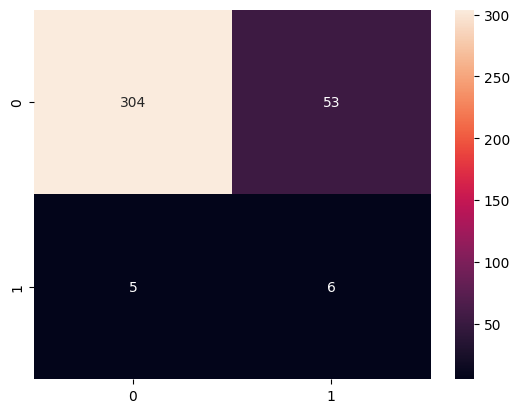

In [254]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rf_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d')


In [253]:
print("Accuracy de linearRegre {} %".format( 100 * accuracy_score(y_test,lr_pred)))
print("Accuracy de DesiciconTree {} %".format( 100 * accuracy_score(y_test,dt_pred)))
print("Accuracy de RandomForest {} %".format( 100 * accuracy_score(y_test,rf_pred)))

Accuracy de linearRegre 86.68478260869566 %
Accuracy de DesiciconTree 77.98913043478261 %
Accuracy de RandomForest 84.23913043478261 %


1. Los datos de los exempleados son más pequeños: 59 ejemplos.
2. La Matriz de confusion nos muestra claramente que puede identificar bien quienes son nuestros empleados 304 Verdaderos Positivos
3. Pero no puede identificar muy bien los exempleados.

![Matriz](media/matriz1.png)

En otros casos donde **son importantes métricas cómo la sensibilidad(Recall)** que representa la tasa de verdaderos positivos (True Positive ) TP. Es la proporción entre los casos positivos bien clasificados por el modelo, respecto al total de positivos.

> **Por ejemplo:** Si queremos clasificar bien a los pacientes que tienen alguna enfermedad para no dar un mal diagnostico a pacientes sanos.

### Queremos identificar tanto a empleados actuales y exempleados,  para entender por qué se fueron y los que son propensos a irse... Aplicaremos técnicas SMOTE para igualar los dos conjuntos de datos de empleados y exempleados.



Debemos resamplear el conjunto minoritario ya que los datos estan desbalanceados. Usaremos la técnica de oversamplig SMOTE

In [255]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0,sampling_strategy='minority')

X_resampled, y_resampled = smote.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled,
                                                        y_resampled,
                                                        test_size=0.25,
                                                        random_state=42)

In [258]:
y_resampled.shape

(2466,)

### Entrenamos y evaluamos nuevamente los tres clasifcadores, despues de aplicar oversampling con SMOTE.

In [259]:
lr.fit(Xr_train, yr_train)
dt.fit(Xr_train, yr_train)
rf.fit(Xr_train, yr_train)

RandomForestClassifier()

In [260]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression
lr_pred = lr.predict(Xr_test)
lr_report = classification_report(yr_test, lr_pred)

print("Logistic Regression:")
print("Classification Report:\n", lr_report)

# Decision Tree
dt_pred = dt.predict(Xr_test)
dt_report = classification_report(yr_test, dt_pred)

print("Decision Tree:")
print("Classification Report:\n", dt_report)

# Random Forest
rf_pred = rf.predict(Xr_test)
rf_report = classification_report(yr_test, rf_pred)

print("Random Forest:")
print("Classification Report:\n", rf_report)

Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       311
           1       0.81      0.81      0.81       306

    accuracy                           0.81       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.81      0.81      0.81       617

Decision Tree:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       311
           1       0.81      0.84      0.82       306

    accuracy                           0.82       617
   macro avg       0.82      0.82      0.82       617
weighted avg       0.82      0.82      0.82       617

Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       311
           1       0.93      0.90      0.92       306

    accuracy                           0.92       617
   ma

**Bastante mejor* después de aplicar el oversampling.*

**Vamos a quedarnos con el modelo de Random Forest que es el que se ve más interesante y vamos a evaluar como han sido sus resultados con la matriz de confusión**

### Conclusiones:
>Las métricas en la clase 1 (exempleados) mejoran considerablemente, es decir el modelo ya podria predecir cúal de los empleados en la compañia son propensos o no a irse y cuales son propensos a quedarse, de hecho las metricas en los tres modelos son practicamente calcadas, separa ambas clases de una casi identica. ¿Esto podría indicar que los empleados propensos a abandonar la compañia podrían ser cualquiera?

In [261]:
yr_test.shape

(617,)

**Recordemos que en nuestro ejemplo:**

0= Empleados
1=Exempleados.

- **TP (True Positive):** El número de instancias de la clase 0 (Empleados) que se clasificaron correctamente como clase 0.
- **FN (False Negative):** El número de instancias de la clase 0 que se clasificaron incorrectamente como clase 1.
- **FP (False Positive):** El número de instancias de la clase 1 que se clasificaron incorrectamente como clase 0.
- **TN (True Negative):** El número de instancias de la clase 1 que se clasificaron correctamente como clase 1.

- **Recall** Es una métrica importante cuando tienes conjuntos desbalanceados como es el caso.

![rend](media/rend.png)

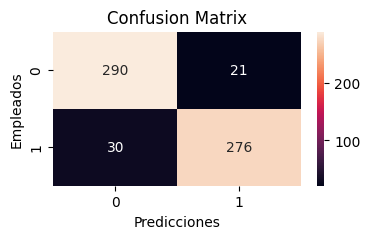

In [262]:
# Matriz de confusion de el modelo de random Forest
cm = confusion_matrix(yr_test, rf_pred) #Matriz de confusion de random Forest.
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Empleados')
plt.title('Confusion Matrix')
plt.show()

### Vamos a usar otra metrica comúnmente usada para para evaluar los modelos de clasificación: LA CURVA ROC Y AUC.

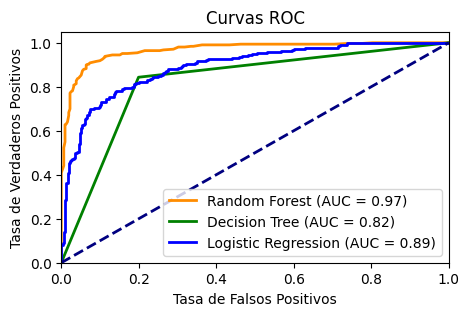

In [265]:
# Obtener las probabilidades de la clase positiva para cada modelo
probas_rf = rf.predict_proba(Xr_test)[:, 1]
probas_dt = dt.predict_proba(Xr_test)[:, 1]
probas_lr = lr.predict_proba(Xr_test)[:, 1]

# Calcular las tasas de verdaderos positivos, las tasas de falsos positivos y los umbrales para cada modelo
fpr_rf, tpr_rf, thresholds_rf = roc_curve(yr_test, probas_rf)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(yr_test, probas_dt)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(yr_test, probas_lr)

# Calcular el área bajo la curva ROC (AUC) para cada modelo
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Trazar las curvas ROC para cada modelo en una misma figura
plt.figure(figsize=(5,3))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc="lower right")
plt.show()


### Probemos con XGBoost con estos nuevos datos.

In [263]:
# Siempre me gusta Crear una matriz DMatrix para mejorar el rendimiento de xgboost.
# Los datos de entrenamiento ya los tenemos creados.
import xgboost as xgb
from sklearn.metrics import classification_report

dtrain = xgb.DMatrix(Xr_train, label=yr_train)
dtest = xgb.DMatrix(Xr_test, label=yr_test)

# Definir los parámetros del modelo
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Entrenar el modelo
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Paso 6: Realizar predicciones con el conjunto de prueba
y_pred = model.predict(dtest)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Convertir las probabilidades de predicción en etiquetas binarias
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calcular el informe de clasificación
report = classification_report(yr_test, y_pred_binary)

# Imprimir el informe de clasificación
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       311
           1       0.91      0.87      0.89       306

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617



In [264]:
print(classification_report(yr_test, rf_pred)) #Reporte de el modelo randomForest

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       311
           1       0.93      0.90      0.92       306

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



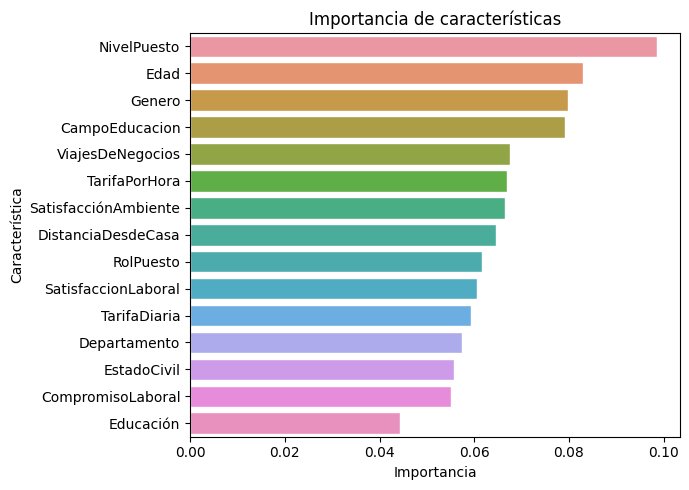

In [330]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(Xr_train, yr_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [X.columns[i] for i in indices]

plt.figure(figsize=(7, 5))
sns.barplot(x=importances[indices], y=sorted_feature_names, edgecolor='white')
plt.xticks(rotation=0)  # Girar los ticks del eje x en 0 grados
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Importancia de características")
plt.tight_layout()
plt.show()


**Insights:**

En constraste con el primero modelo, que consideraba otras características importantes, Al aplicar SMOTE y entrenar el Random Forest nuevamente, vemos que le dio bastante importancia a caracteristicas como:
- el nivel de opcion a acciones de la empresa
- la edad
- la satisfaccion en el ambiente de trabajo.

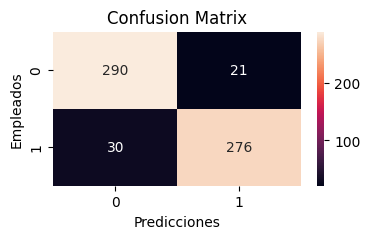

In [267]:
cm = confusion_matrix(yr_test, rf_pred) #Matriz de confusion de random Forest.
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Empleados')
plt.title('Confusion Matrix')
plt.show()

Podemos ver que el modelo ya identifica mejor los empleados que son propensos a abandonar la compañia (1) o True Negatives, pero como consecuencia degrada un poco el reconocimeinto de las instancias de empleados actuales(0), **esto es normal ya que el modelo ha reducido un poco su sensibilidad hacia la clase mayoritaria.**

Al aumentar el umbral de clasificación, se tiende a reducir los falsos positivos y aumentar la precisión, pero esto también puede llevar a una disminución del recall, ya que se pueden clasificar incorrectamente algunas instancias positivas. Por otro lado, al disminuir el umbral de clasificación, se tiende a aumentar el recall, pero también puede aumentar la cantidad de falsos positivos y disminuir la precisión.

## Creación y Evaluacion de un modelo de red neuronal para clasificación con Tensorflow y Keras.

Vamos a crear otro modelo distinto, se trata de una red neuronal a ver que tla su desempeño con estos datos de Empelados. y veremos si funciona mejor o peor que los algoritmos tradicionales de Arboles de Decision y Ensamble.

#### La manera más rapida de crear el modelo es con la libreria de Tensorflow y Keras con la API sequential para ensamblar una red neuronal por capas.

In [269]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [282]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(30, )))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


Esta red neuronal es de tipo sequential usando la API TensorFlow-Keras que consta de cuatro capas densas (fully connected).

1. Capa Dense con 256 unidades y activación ReLU: Esta es la capa de entrada de la red y tiene una forma de entrada de (30,). Tiene 256 neuronas o unidades y utiliza la función de activación ReLU (Rectified Linear Unit). La capa Dense está completamente conectada, lo que significa que cada neurona en esta capa se conecta con todas las neuronas de la capa anterior.

2. Capa Dense con 256 unidades y activación ReLU: Esta es la segunda capa oculta de la red. También tiene 256 unidades y utiliza la función de activación ReLU.

3. Capa Dense con 256 unidades y activación ReLU: Al igual que las capas anteriores, está completamente conectada a la capa anterior.

4. La cuarta y última capa densa de salida tiene una sola unidad con activación sigmoide porque se trata de un problema de clasificación binaria. La función sigmoide mapea los valores de entrada a un rango entre 0 y 1, lo que se interpreta como la probabilidad de que el ejemplo de entrada pertenezca a la clase positiva.

En una tarea de clasificación binaria, solo hay dos clases posibles, por ejemplo, "sí" o "no","verdadero" o "falso", "0" o "1"

**He probado con varias configuraciones como por ejemplo quitarle una capa, agregarle mas epochs de entrenamiento, o mas neuronas a cada capa, todo esto con el fin de crear el mdoelo mas robusto posible.

**El caso es ensayar y probar varias configuraciones ya que el objetivo es que el modelo o la red neuronal generalicen lo mejor posible los datos**

La configuración que mejor me ha funcionado hasta ahora son 4 capas densas de 256 neuronas y un entrenamiento durante 40 Epochs.

In [283]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               7936      
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
_________________________________________________________________


In [284]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [285]:
# usaremos los datos de nuestro conjunto hecho con oversampling de SMOTE
# Instanciaremos history para capturar el rendimiento del modelo y mostrarlo.
history = model.fit(Xr_train, yr_train, epochs=35, validation_data=(Xr_test, yr_test))

Epoch 1/35
58/58 [==============================] - 1s 6ms/step - loss: 0.6866 - accuracy: 0.6182 - val_loss: 0.5814 - val_accuracy: 0.6726
Epoch 2/35
58/58 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.7155 - val_loss: 0.5454 - val_accuracy: 0.6888
Epoch 3/35
58/58 [==============================] - 0s 5ms/step - loss: 0.5179 - accuracy: 0.7523 - val_loss: 0.5064 - val_accuracy: 0.7520
Epoch 4/35
58/58 [==============================] - 0s 5ms/step - loss: 0.4700 - accuracy: 0.7707 - val_loss: 0.4714 - val_accuracy: 0.7666
Epoch 5/35
58/58 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.7999 - val_loss: 0.4641 - val_accuracy: 0.7699
Epoch 6/35
58/58 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8167 - val_loss: 0.4342 - val_accuracy: 0.7763
Epoch 7/35
58/58 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.8394 - val_loss: 0.4424 - val_accuracy: 0.7909
Epoch 8/35
58/58 [==

In [286]:
yr_pred = model.predict(Xr_test)
yr_pred = (yr_pred > 0.5)


20/20 [==============================] - 0s 2ms/step


In [287]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

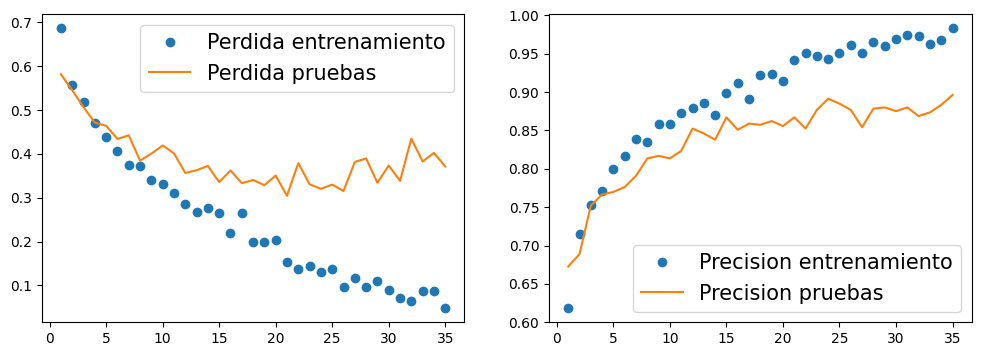

In [288]:
import matplotlib.pyplot as plt
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], 'o', label='Perdida entrenamiento')
ax.plot(x_arr, hist['val_loss'], label='Perdida pruebas')
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], 'o', label='Precision entrenamiento')
ax.plot(x_arr, hist['val_accuracy'],
        label='Precision pruebas')
ax.legend(fontsize=15)
plt.show()

Text(0, 0.5, 'Training Loss')

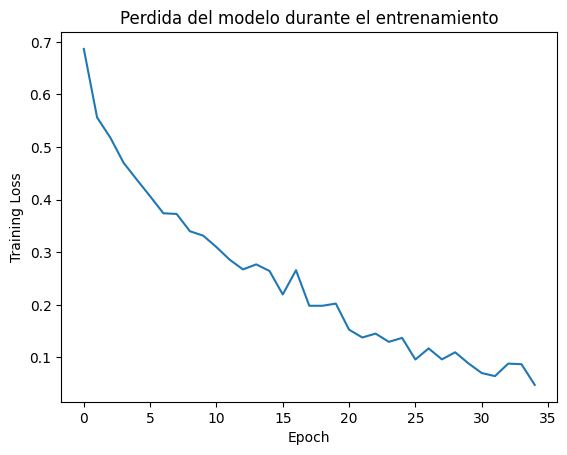

In [289]:
plt.plot(history.history['loss'])
plt.title('Perdida del modelo durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

Text(0, 0.5, 'Precision')

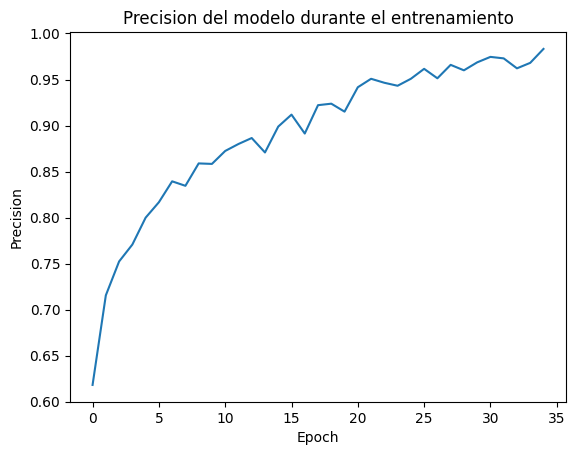

In [290]:
plt.plot(history.history['accuracy'])
plt.title('Precision del modelo durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Precision')

<Axes: >

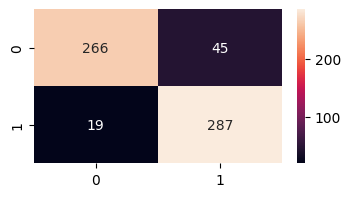

In [292]:
# Matriz de confusion de la red neuronal
plt.figure(figsize=(4,2))
cm = confusion_matrix(yr_test, yr_pred)
sns.heatmap(cm, annot=True,fmt= 'd')


### Conclusiones:

Vemos que el modelo de red neuronal tambien funciona bastante bien es un modelo robusto si sabemos los parametros que debemos ir ajustando, aunque podríamos seguir moviendo parametros o utilizar un modelo mas complejo para que sea mas robusto, el modelo de Random Forest me da mejores resultados.

In [293]:
print(classification_report(yr_test, yr_pred)) #Red Neuronal.

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       311
           1       0.86      0.94      0.90       306

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617



In [294]:
print(classification_report(yr_test, rf_pred)) # Random Forest


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       311
           1       0.93      0.90      0.92       306

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



In [300]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [X.columns[i] for i in indices]

print("Lista de características más importantes:\n")
for feature_name, importance in zip(sorted_feature_names, importances[indices]):
    print(f"{feature_name}: {importance}")

Lista de características más importantes:

NivelOpcionAcciones: 0.08076401575627895
NivelPuesto: 0.06831059196800589
Edad: 0.06317103486031306
IngresoMensual: 0.051876777351592435
SatisfacciónAmbiente: 0.04709394291298631
SatisfaccionLaboral: 0.04420387764585864
AñosEnEmpresa: 0.042551793974237785
CompromisoLaboral: 0.0394308187855117
TarifaPorHora: 0.03922845949857256
TotalAñosTrabajados: 0.03870906145089693
AñosConActualGerente: 0.03837820384724891
DistanciaDesdeCasa: 0.03807297318916913
TarifaMensual: 0.03778628721000855
TarifaDiaria: 0.037743505225057546
EntrenamientosAñoPasado: 0.03453168131071937
%IncrementoSalario: 0.030142606141572128
AñosEnRolActual: 0.029570335338233764
EquilibrioVidaLaboral: 0.027283349354575416
SatisfacciónRelaciones: 0.02566532279338055
ViajesDeNegocios: 0.02474481530042389
NumEmpresasTrabajo: 0.02407854101600047
Educación: 0.02290533347678307
CampoEducacion: 0.021085139506397295
RolPuesto: 0.0196473729790413
AñosDesdeUltimaPromocion: 0.019323962027471907


<div style="background-color: #90EE90; padding: 10px;">
    Basándonos en las características de este modelo considera más importantes, podemos identificar las que posiblemente sean determinantes a la hora de los empleados abandonar o no la empresa. Esto nos permite comprender qué aspectos podrían tener un mayor impacto en la retención de los empleados y nos brinda información valiosa para tomar medidas preventivas
</div>

### Por último vamos a crear un modelo solo con 15  Caráctersiticas, esto nos dara una idea de los datos realmente importantes que podría considerar un empleado a la hora de decidir quedarse o no en la empresa.

Además vamos a crear otros Tres modelos con esas caracteristicas y veamos su rendimeinto.

### Utilizaremos el modulo Recursive Feature elimination de SKlearn

In [331]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Crear un modelo base
estimador = RandomForestClassifier()

# Crear el objeto RFE y especificar el mdoelo y el número de características a seleccionar
rfe = RFE(estimator=estimador, n_features_to_select=15)

# Ajustar el modelo RFE a los datos
rfe.fit(X_resampled, y_resampled)

# Obtener las características seleccionadas
caracteristicas_seleccionadas = rfe.support_
indices_caracteristicas = np.where(caracteristicas_seleccionadas)[0]

print("Características seleccionadas:")
for indice in indices_caracteristicas:
    print(X.columns[indice])


Características seleccionadas:
Edad
TarifaDiaria
DistanciaDesdeCasa
SatisfacciónAmbiente
TarifaPorHora
CompromisoLaboral
NivelPuesto
SatisfaccionLaboral
IngresoMensual
TarifaMensual
%IncrementoSalario
NivelOpcionAcciones
TotalAñosTrabajados
AñosEnEmpresa
AñosConActualGerente


In [321]:
RFE = ['Edad', 'TarifaDiaria', 'DistanciaDesdeCasa', 'SatisfacciónAmbiente',
                     'TarifaPorHora', 'CompromisoLaboral', 'NivelPuesto', 'SatisfaccionLaboral',
                     'IngresoMensual', 'TarifaMensual', '%IncrementoSalario', 'NivelOpcionAcciones',
                     'TotalAñosTrabajados', 'AñosEnEmpresa', 'AñosConActualGerente', 'Rotacion']

# Crear un nuevo dataframe solo con las columnas deseadas
df2 = empleados_df[RFE]

In [322]:
X1 = df2.drop(['Rotacion'], axis=1)
y1 = df2['Rotacion']

In [324]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0,sampling_strategy='minority')

X_res, y_res = smote.fit_resample(X1, y1)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res,
                                                        y_res,
                                                        test_size=0.25,
                                                        random_state=42)

In [325]:
lr.fit(Xr_train, yr_train)
dt.fit(Xr_train, yr_train)
rf.fit(Xr_train, yr_train)

RandomForestClassifier()

In [326]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression
lr_pred = lr.predict(Xr_test)
lr_report = classification_report(yr_test, lr_pred)

print("Logistic Regression:")
print("Classification Report:\n", lr_report)

# Decision Tree
dt_pred = dt.predict(Xr_test)
dt_report = classification_report(yr_test, dt_pred)

print("Decision Tree:")
print("Classification Report:\n", dt_report)

# Random Forest
rf_pred = rf.predict(Xr_test)
rf_report = classification_report(yr_test, rf_pred)

print("Random Forest:")
print("Classification Report:\n", rf_report)

Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       311
           1       0.75      0.80      0.77       306

    accuracy                           0.77       617
   macro avg       0.77      0.77      0.77       617
weighted avg       0.77      0.77      0.77       617

Decision Tree:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.81       311
           1       0.79      0.85      0.82       306

    accuracy                           0.81       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.81      0.81      0.81       617

Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       311
           1       0.88      0.90      0.89       306

    accuracy                           0.89       617
   ma

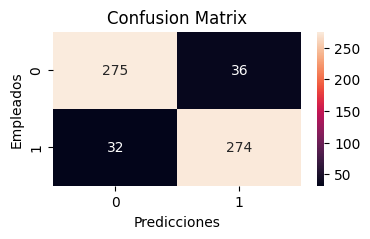

In [327]:
cm = confusion_matrix(yr_test, rf_pred) #Matriz de confusion de random Forest.
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Empleados')
plt.title('Confusion Matrix')
plt.show()

### En resumen, con solo 15 características el modelo nos da un rendimiento básicamente igual al que tenia, es decir esas son las clases mas importantes o más determinantes para nuestro caso de negocio.
- Edad
- TarifaDiaria
- DistanciaDesdeCasa
- SatisfacciónAmbiente
- TarifaPorHora
- CompromisoLaboral
- NivelPuesto
- SatisfaccionLaboral
- IngresoMensual
- TarifaMensual
- %IncrementoSalario
- NivelOpcionAcciones
- TotalAñosTrabajados
- AñosEnEmpresa
- AñosConActualGerente

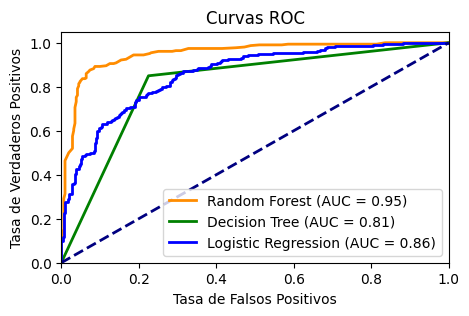

In [332]:
probas_rf = rf.predict_proba(Xr_test)[:, 1]
probas_dt = dt.predict_proba(Xr_test)[:, 1]
probas_lr = lr.predict_proba(Xr_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(yr_test, probas_rf)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(yr_test, probas_dt)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(yr_test, probas_lr)


roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(5,3))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc="lower right")
plt.show()